# How rgb2gray() works?

An RGB image is essentially 3 images layered on top of one another. The layers are named Red, Green and Blue representing the primary colours.

Decolourising an RGB image is a widely discussed topic as it can be a crucial pre-processing step for Computer Vision or Image Processing tasks.

A typical decolorization algorithm such as rgb2gray in MATLAB works by forming a new matrix from a weighted sum of the 3 layers of RGB.

According to [MATLAB's documentation](https://www.mathworks.com/help/matlab/ref/rgb2gray.html), the weights are identical to the rgb2ntsc() function except the weights are not rounded to 3 decimal places. Note that only the Y component (Luminance) of the rgb2ntsc() function is considered here. The final formula would be as follows:

GRAY = 0.2989 * R + 0.5870 * G + 0.1140 * B

OpenCV's implementation is also identical to MATLAB's implementation.

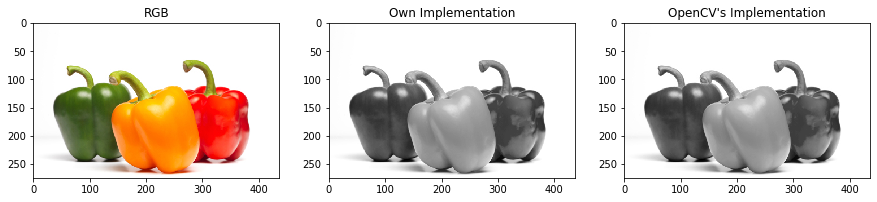

In [33]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def rgb2gray(img):
    h = img.shape[0]
    w = img.shape[1]
    gray = np.zeros((h,w))
    
    for i in range(h):
        for j in range(w):
            gray[i,j] = 0.2989*img[i,j,0] + 0.587*img[i,j,1] + 0.114*img[i,j,2]
            
    return gray

sample_img = cv.imread("3peppers.jpg")
sample_img = cv.cvtColor(sample_img, cv.COLOR_BGR2RGB)

gray_img = rgb2gray(sample_img)
gray2_img = cv.cvtColor(sample_img, cv.COLOR_RGB2GRAY)

plt.figure(figsize=(15,7.5))
plt.subplot("131")
plt.title("RGB")
plt.imshow(sample_img)
plt.subplot("132")
plt.title("Own Implementation")
plt.imshow(gray_img, cmap="gray")
plt.subplot("133")
plt.title("OpenCV's Implementation")
plt.imshow(gray2_img, cmap="gray")
plt.show()

# Is it good enough?

From a look, it can be said that a lot of information is lost when the colours are not present. It is now almost impossible to tell that all 3 peppers are actually different colours.

There are also scientific methods to measure the 'quality' of a grayscale image. It can tell us if a grayscale image still preserves contrasts and the preception of the original image.